# 4. Pre-Processing and Training Data

## Libraries

### Installations

In [5]:
#!pip install xlsxwriter
#!pip install pmdarima
#!pip install --upgrade pycaret
#!pip install --upgrade statsmodels
#!pip install ppscore

### Imports

In [39]:
#File and name management libraries
import os
import shutil
import glob
from pathlib import Path

#Math & data handling libraries
import pandas as pd
import numpy as np

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#dates and timeframe libraries
import datetime
import matplotlib.dates as mdates

#Assocations and correlations libraries
import ppscore as pps

#Machine learning libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pycaret.regression import *

#Other file formats libraries
import xlsxwriter

## Modeling Settings

### n-month ahead prediction

In [2]:
# Define n-month ahead prediction (1-6)
N_MONTH = 1
print(N_MONTH)

1


### Directories

In [38]:
#### Root derectory ####

# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)
print(ROOT_DIR)

AttributeError: module 'os' has no attribute 'ppscorepath'

In [4]:
#### File directory ####

#Define file name and location
file_csv = 'step3_eda_wti_price.csv'
file_path = '\\data\\interim\\'

#Set file name and location
f = ROOT_DIR + file_path + file_csv
print(f)

D:\gitProjects\WTI_Crude_Oil_Price_Prediction_Using_ML\data\interim\step3_eda_wti_price.csv


In [5]:
#### Model directory ####
# Change direcotry to the '\models' folder
# Generate the name
model_name = 'regression_model_' + str(N_MONTH) + 'm'
model_path =  ROOT_DIR + '\\models\\' + model_name


#verwrite folder if exisits
if os.path.exists(model_path):
    shutil.rmtree(model_path)

#Make folder
try: 
    os.mkdir(model_path)
except OSError as error: 
    print(error)

os.chdir(model_path)
os.getcwd()

'D:\\gitProjects\\WTI_Crude_Oil_Price_Prediction_Using_ML\\models\\regression_model_1m'

### Targe feature 

In [6]:
#Set target feature
TARGET_FEATURE = 'wti'

## Read Data

In [7]:
#cast csv to dataframe
df = pd.read_csv(f)

#convert 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors="raise")

#set Date as index
df.set_index('Date', drop=True, inplace=True)

#print shape of dataframe
print('Shape:',df.shape)

#display df head
display(df.head(7).round(2).T)

Shape: (280, 29)


Date,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01
wti,27.26,29.37,29.84,25.72,28.79,31.82,29.70
oil_opec,26.01,26.68,26.61,27.52,28.05,27.64,27.91
oil_nonopec,46.90,46.82,46.94,46.62,46.62,46.78,47.05
oil_world,5.78,5.85,5.92,5.85,5.85,5.82,5.74
henry_hub_ng,47.23,50.23,49.36,46.29,47.34,47.96,47.25
oil_us,28.29,28.77,28.53,28.13,28.22,28.27,28.54
petrol_oecd,1.69,1.70,1.71,1.71,1.71,1.72,1.73
petrol_nonoecd,1.29,1.30,1.31,1.31,1.32,1.32,1.33
us_cpi,0.75,0.84,0.90,0.85,0.88,0.97,0.93
us_ppi,92.02,92.27,92.91,93.54,93.59,93.74,93.84


## Pre-process

#### Custom functions

In [8]:
def get_var_name(variable):
    '''This function gets a variable and prints its name'''
    globals_dict = globals()

    return [var_name for var_name in globals_dict if globals_dict[var_name] is variable]

In [9]:
def count_missing(df):
    ''' Count the number of missing values .isnull() in each column well as the percentages 
    Call pd.concat() to form a single table df with 'count' and '%' columns'''
    
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns=['count', '%']
    missing = missing.loc[missing['count'] > 0]
    missing.sort_values(by='count', ascending = False)
    
    return missing

In [10]:
def count_over_thershold(li, bounding_limit: tuple):
    '''This function gets a list and print how many items are larger than a thersold'''
    
    #counters
    n = len(li)
    m = 0    
    for i in li:
        if i >= bounding_limit[1] or i < bounding_limit[0] :
            m +=1
    pct = 100.0*m/n
    print(f'{pct:1.2f}% of items ({m}/{n}) are out of {bounding_limit}')   

In [11]:
def highlight_out_of_range(data, title:str, ylabel, bounding_limit: tuple, figsize = (15, 2)):
    '''This functions gets PPS score for target feature and plot a bar plot'''
    lower_bound = bounding_limit[0]
    upper_bound = bounding_limit[1]
    
    #Plot the scores for a select feature from PPS Matrix
    data= data.sort_values(ascending = False)

    #The value > thershold will be show with a different color.
    #So, the plot colors will be dynamically set based on the data

    #Create and empty list of colors
    colors = []

    #Set color for ratio values
    #Set "red" if value is max, otherwise "blue" (as default)
    for index, value in data.items():
        if value >= upper_bound or value <= lower_bound:
            colors.append('#f77088') #red for max
        else:
            colors.append('#66aabb') #blue as default

    #set chart size
    fig = plt.figure(figsize = figsize)

    #Pass the x and height values with color set to bar plotter
    plt.bar(data.index,data.values, width = .8, color=colors)

    #Rotate the x labels for better visuzlaizarion
    plt.xticks(rotation=90)

    #Set labels
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim([round(lower_bound), round(upper_bound)])
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.4)
    
    #Add axis lines
    #plt.axvline(x=0, c='k', ls='-', alpha=0.8)
    plt.axhline(y=0, c='gray', ls='-', alpha=0.8)

    #print number of values out of limits
    count_over_thershold(data, bounding_limit)

    #save the file
    plt.savefig(ylabel +'.png', dpi=300, bbox_inches = 'tight')
    
    #Show the plot
    plt.show()


In [12]:
def target_corr_coeff(df, feature):
    
    # Compute the correlation matrix
    corr = df.corr()
    y_scores = corr[feature]
    
    y_scores.drop(TARGET_FEATURE, inplace = True)
    
    return y_scores

In [13]:
def target_pps_score(df, feature):
    # Compute the PPS matrix
    matrix = pps.matrix(df)
    matrix_pps = matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    y_scores = matrix_pps[feature]
    
    y_scores.drop(TARGET_FEATURE, inplace = True)
    
    return y_scores

### Generate n-month future price data 

In [14]:
#Make a copy of dataframe
df_new = df.copy()

#Shift by n-month
df_new[TARGET_FEATURE] = df_new[TARGET_FEATURE].shift(-N_MONTH)

#print tail of 1,2,3,6-month future dataframes
display(df_new.tail(13))

,wti,oil_opec,oil_nonopec,oil_world,henry_hub_ng,oil_us,petrol_oecd,petrol_nonoecd,us_cpi,us_ppi,...,global_econ_policy_uncert,copper_futures,dow_jones,gold_futures,nasdaq_comp,sp500,usd_index,wti_bre_sprd,wti_crack_sprd,bre_crack_sprd
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-01,109.55,28.590000,64.603255,11.668387,44.688724,53.125505,2.88611,2.686788,3.76109,101.1941,...,299.369775,4.4085,34314.990000,1918.6,13394.163000,4391.296000,102.96,95.18,96343.002265,96628.542265
2022-05-01,114.84,28.104654,65.002336,11.629127,45.097091,53.525117,2.91268,2.725040,4.18620,100.8630,...,287.885641,4.2990,32379.462857,1856.3,11829.729524,4040.360000,101.75,101.41,96267.296432,96571.526432
2022-06-01,101.62,28.300000,65.331052,11.797257,46.333224,54.316138,2.94728,2.740642,4.66799,100.4645,...,272.230457,3.7100,31446.712857,1816.3,11418.919048,3898.946667,104.68,107.14,96822.210421,97143.630421
2022-07-01,93.67,28.520000,66.275370,11.844011,46.362408,53.623941,2.94628,2.710093,4.06401,100.7345,...,313.459666,3.5750,31535.323500,1781.8,11622.631500,3911.729500,105.90,94.34,98061.002238,98344.022238
2022-08-01,84.26,29.530000,65.886271,12.002495,47.017000,53.549209,2.95320,2.698022,3.54467,100.9427,...,254.960194,3.5190,33009.564783,1726.2,12570.260435,4158.563043,108.70,84.86,98755.084609,99009.664609
2022-09-01,87.55,29.650000,66.112125,12.337328,46.508033,54.169718,2.96539,2.680926,3.60701,101.1402,...,279.801750,3.4125,30649.559524,1684.9,11402.850000,3850.520476,112.12,76.38,99023.842877,99252.982877
2022-10-01,84.37,29.195000,66.735784,12.416878,45.434557,52.825221,2.97987,2.648055,3.81173,101.2339,...,298.664504,3.3750,30570.683810,1654.9,10801.494286,3726.050952,111.53,81.89,99289.107702,99534.777702
2022-11-01,76.44,28.730000,67.141905,12.379263,46.380108,53.708495,2.98598,2.628974,3.61972,100.4743,...,329.304359,3.7380,33417.958095,1775.1,10973.638095,3917.488571,105.95,78.92,99331.028299,99567.788299
2022-12-01,78.12,28.820000,65.892587,12.148566,46.143665,54.611816,2.98990,2.612931,2.88864,98.2973,...,260.640859,3.8105,33482.257143,1842.2,10838.995714,3912.380952,103.52,70.91,97921.661050,98134.391050


### Handle Missing Values

#### Print missing values

In [15]:
count_missing(df_new)

,count,%
wti,1,0.357143


#### Impute missing values

In [16]:
dropped_row = df_new.dropna(axis = 0, inplace = False)
print('Before:', df_new.shape)
print('After:', dropped_row.shape)

Before: (280, 29)
After: (279, 29)


### Final Dataset

In [17]:
df = dropped_row.copy()

## EDA n-month future

### Associations with target feature

#### High Correlation Coeff

32.14% of items (9/28) are out of (-0.6, 0.6)


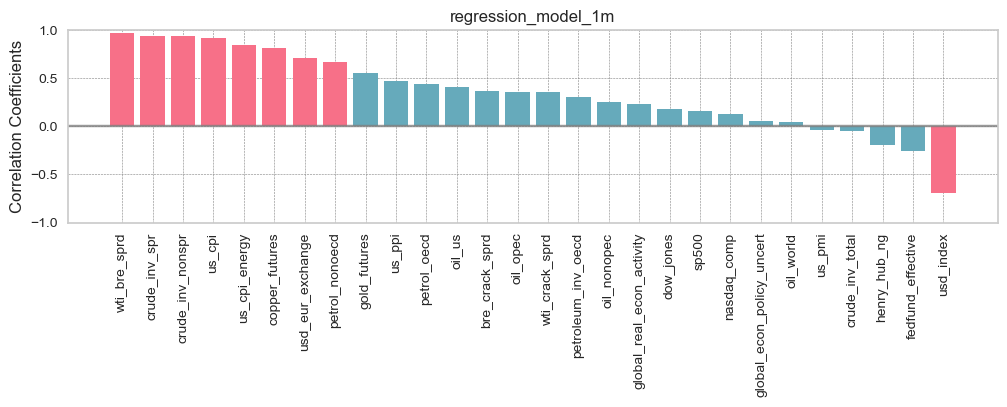

In [18]:
wti_corr_coeff = target_corr_coeff(df, TARGET_FEATURE)

highlight_out_of_range(data = wti_corr_coeff,
                       title = model_name,
                       ylabel = 'Correlation Coefficients',
                       bounding_limit = (-0.6,0.6),
                       figsize = (12, 2.5))

#### High PPS Score

3.57% of items (1/28) are out of (0, 0.6)


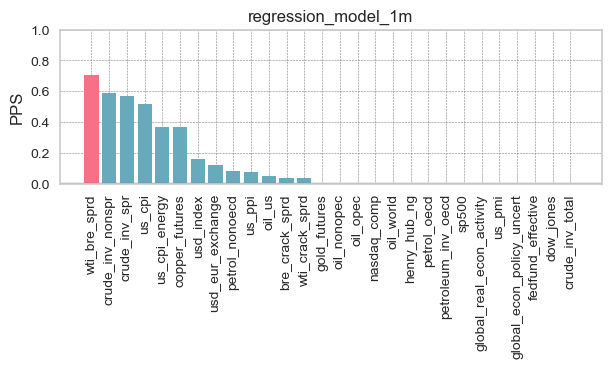

In [19]:
wti_pps_score = target_pps_score(df, TARGET_FEATURE)

highlight_out_of_range(data = wti_pps_score,
                       title = model_name,
                       ylabel = 'PPS',
                       bounding_limit = (0,0.6),
                       figsize = (7, 2))

## Train/Test Split

In [20]:
#expected 70-30 split sizes
print(round(len(df) * 0.7, 0))
print(round(len(df) * 0.3, 0))

195.0
84.0


In [21]:
model_name

'regression_model_1m'

In [22]:
#split data to 70$ train and 30% test sets
#... = train_test_split(X, y, test_size, random_state)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=TARGET_FEATURE),
                                                    df[TARGET_FEATURE], test_size=0.3,
                                                    random_state=47)

In [23]:
print('(X_train, X_test):\n',X_train.shape, X_test.shape)
print('\n(y_train, y_test):\n',y_train.shape, y_test.shape)

(X_train, X_test):
 (195, 28) (84, 28)

(y_train, y_test):
 (195,) (84,)


### Imputing missing feature (predictor) values
Impute missing values using scikit-learn. Learn values to impute from a train split and apply that to the test split.

In [24]:
display(count_missing(X_train))

,count,%


In [25]:
display(count_missing(X_test))

,count,%


In [26]:
#No missing data
X_tr = X_train.copy()
X_te = X_test.copy()

### Scale Data

In [27]:
def scale_train_test_dataframes(X_tr, X_te):
    '''This function gets a dataframe and normalized columns and return a new data frame'''
    
    #store column names
    names = X_tr.columns
    
    from sklearn.preprocessing import StandardScaler

    #Call the StandardScaler`s fit method on `X_tr` to fit the scaler
    #then use it's `transform()` method to apply the scaling to both the train and test split
    #data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively

    scaler = StandardScaler()
    
    #scale data using sklearn preprocessing module
    scaler.fit(X_tr)
    
    X_tr_scaled = scaler.transform(X_tr)
    
    X_te_scaled = scaler.transform(X_te)

    #create new df using scaled data
    X_tr_scaled_df = pd.DataFrame(X_tr_scaled, columns=names)
    X_te_scaled_df = pd.DataFrame(X_te_scaled, columns=names)

    #set index
    X_tr_scaled_df.set_index(X_tr.index, drop=True, inplace=True)
    X_te_scaled_df.set_index(X_te.index, drop=True, inplace=True)

    #return scaled dataframe
    return X_tr_scaled_df, X_te_scaled_df

In [28]:
X_tr_scaled, X_te_scaled_df = scale_train_test_dataframes(X_tr, X_te)

#### Plot scaled data

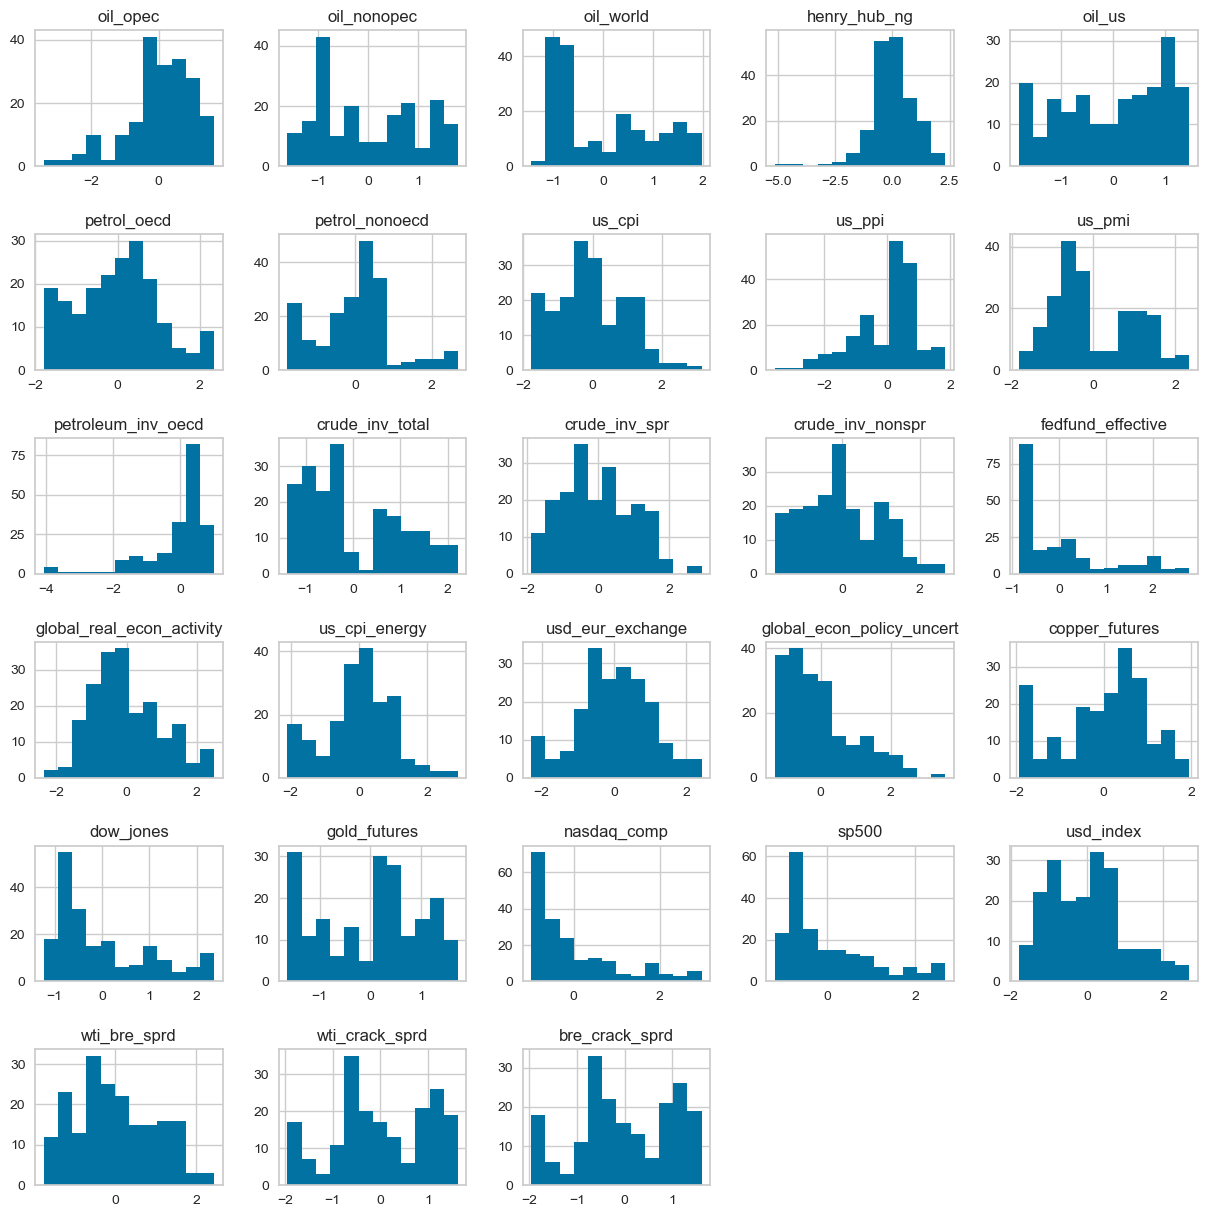

In [29]:
#Plot histogram of all  features
#Call plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
X_tr_scaled.hist(bins = 12, figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

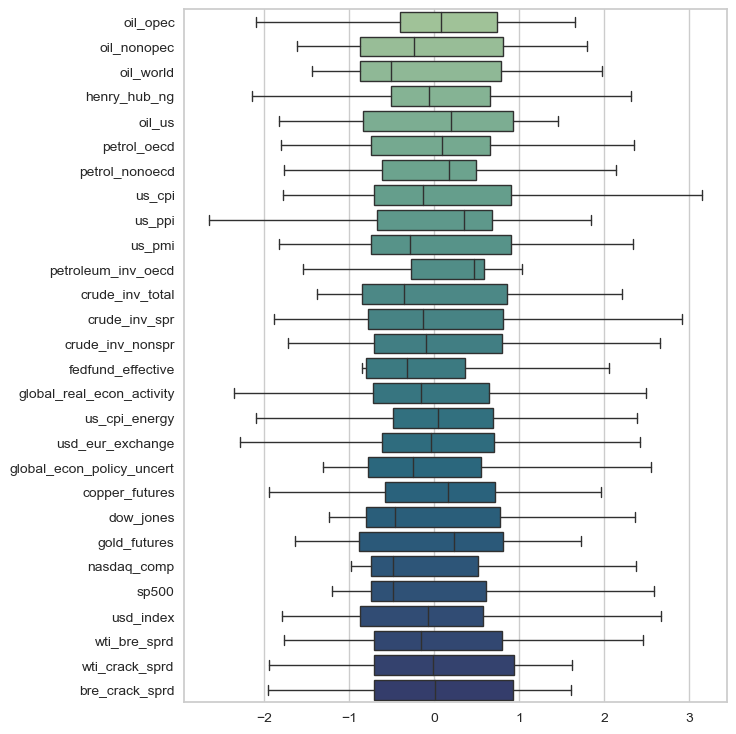

In [30]:
fig, ax = plt.subplots(figsize=(7,9))

sns.boxplot(data = X_tr_scaled,
            orient = 'h',
            width=0.8,
            palette='crest',
            linewidth= 1,
            sym = '')
plt.show()

## Conduct Regression Model in PyCaret

### Setup the session

In [31]:
#Setup Pycaret Regression session
#Transform dataset, normalize and split the dataset.
#Log experiments and plots for experiments to be viewed later with MLflow. 

reg_model = setup(data=df, 
                target=TARGET_FEATURE,
                session_id=786,
                transformation=True,
                normalize=True,
                train_size=0.7,
                log_plots=True)

,Description,Value
0,Session id,786
1,Target,wti
2,Target type,Regression
3,Original data shape,"(279, 29)"
4,Transformed data shape,"(279, 29)"
5,Transformed train set shape,"(195, 29)"
6,Transformed test set shape,"(84, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


### Compare models

In [32]:
# Use compare_models() function to compare ML models and their perfomrance on the data
# Use the default fold value from 10 to 5 for cross-validation generator

# Store the top 5 models in top5.
# We plan to use this for Stacking and Blending purposes. 

top5 = compare_models(n_select=5, sort='RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.3593,32.8081,5.6722,0.9540,0.0954,0.0755,0.2520
rf,Random Forest Regressor,4.4445,32.8853,5.6806,0.9538,0.0947,0.0766,0.3640
lr,Linear Regression,4.5491,34.6759,5.8065,0.9511,0.1481,0.0907,2.3960
ada,AdaBoost Regressor,4.6028,35.8491,5.9513,0.9493,0.1071,0.0840,0.1780
gbr,Gradient Boosting Regressor,4.7118,36.6998,6.0285,0.9480,0.1005,0.0808,0.2380
ridge,Ridge Regression,4.7520,37.2703,6.0545,0.9475,0.1334,0.0905,0.0760
huber,Huber Regressor,4.7677,38.0322,6.0845,0.9464,0.1654,0.0936,0.0960
br,Bayesian Ridge,4.7883,37.9800,6.1133,0.9464,0.1394,0.0916,0.1000
lightgbm,Light Gradient Boosting Machine,4.8609,39.7163,6.2116,0.9442,0.1003,0.0821,0.5280
omp,Orthogonal Matching Pursuit,4.6666,42.5429,6.4604,0.9400,0.1479,0.0889,0.0780


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [34]:
# Case the result to a dataframe
compare_model_table = pull()

### Hyper-parameterization

Tune the top 5 models dynamically with a higher iteration rate (n_iter).

This is to find more optimal hyper parameters over a larger search space. 

In [35]:
#create an empty list with 5 elements
tuned_top5 = [None] * 5

#counter
i = 0 

#interate over the top5 and store the tuned models
for top in top5:
    #tune the model
    tuned_top5[i] = tune_model(top, n_iter=120, optimize='RMSE', fold=5) 
    
    # Save the dataframe to CSV
    tuned_name  = 'pycaret_tune_model_' + str(i+1)
    globals()[tuned_name] = pull()
    
    i += 1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2763,32.0937,5.6651,0.9540,0.0902,0.0704
1,4.0363,29.0275,5.3877,0.9563,0.0895,0.0659
2,5.4742,53.6242,7.3229,0.9319,0.1264,0.0964
3,4.2302,27.8853,5.2807,0.9597,0.1023,0.0868
4,4.0169,23.8676,4.8854,0.9647,0.0760,0.0643
Mean,4.4068,33.2997,5.7084,0.9533,0.0969,0.0768
Std,0.5435,10.4983,0.8451,0.0113,0.0169,0.0126


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.5593,34.4786,5.8718,0.9506,0.0943,0.0753
1,4.1757,36.0227,6.0019,0.9457,0.0900,0.0667
2,5.0568,45.0225,6.7099,0.9429,0.1206,0.0894
3,3.6301,20.4592,4.5232,0.9704,0.0886,0.0757
4,3.7683,22.6994,4.7644,0.9664,0.0751,0.0599
Mean,4.2381,31.7365,5.5742,0.9552,0.0937,0.0734
Std,0.5230,9.0693,0.8151,0.0111,0.0149,0.0099


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 120 candidates, totalling 600 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.3117,50.3370,7.0949,0.9279,0.2850,0.1076
1,3.1739,18.9134,4.3490,0.9715,0.0807,0.0569
2,5.2958,43.7399,6.6136,0.9445,0.1237,0.1002
3,4.5999,33.3039,5.7710,0.9519,0.1462,0.1075
4,4.3641,27.0854,5.2044,0.9599,0.1047,0.0814
Mean,4.5491,34.6759,5.8065,0.9511,0.1481,0.0907
Std,0.7832,11.2728,0.9798,0.0147,0.0718,0.0194


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:03:37
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,AdaBoost Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: 

### Combine top 5 models

#### Build blend models

In [ ]:
# Building a blending model from our top 5 models and evaluate the results. 
# Blending models is an ensemble method of combining different machine learning algorithms.
# Use a majority vote to build consensus of final prediction values.

blender_specific = blend_models(estimator_list=tuned_top5[0:], fold=5, optimize='RMSE', choose_better=False)

In [ ]:
# Case the result to a dataframe
pycaret_blend_model = pull()

In [ ]:
# Below is a view of the model parameters. 
print(blender_specific)
display(blender_specific)

#### Build stack models

In [ ]:
# Build a stacking model from our top 5 models and evaluate the results.
# Stacking models is an ensemble method of using meta learning.
# A meta model is created using multiple base estimators to generate the final prediction.

stacker_specific = stack_models(estimator_list=tuned_top5[1:],
                                meta_model=tuned_top5[0],
                                fold=5,
                                optimize='RMSE',
                                choose_better=False)

In [ ]:
# Case the result to a dataframe
pycaret_stack_model = pull()

In [ ]:
# Below is a view of the model parameters. 
print(stacker_specific)
display(stacker_specific)

### Evaluare models

#### Evaluate blend model

In [ ]:
evaluate_model(blender_specific)

#### Evaluate stack model

In [ ]:
evaluate_model(stacker_specific)

#### Evaluate the performances

In [ ]:
print('cooks: blend vs stack')
plot_model(blender_specific, plot='cooks', verbose=True, scale=1)
plot_model(stacker_specific, plot='cooks', verbose=True, scale=1)

print('manifold: blend vs stack')
plot_model(blender_specific, plot='manifold', verbose=True, scale=1)
plot_model(stacker_specific, plot='manifold', verbose=True, scale=1)

In [ ]:
# Use Pycaret's built in plot_model() function to generate side-by-side plots:
# Dispaly Residuals chart, Prediction Error and Cross Validation (learning) charts.
print('residuals: blend vs stack')
plot_model(blender_specific, plot='residuals', scale=1)
plot_model(stacker_specific, plot='residuals', scale=1)

print('error: blend vs stack')
plot_model(blender_specific, plot='error', scale=1)
plot_model(stacker_specific, plot='error', scale=1)

print('learning: blend vs stack')
plot_model(blender_specific, plot='learning', scale=1)
plot_model(stacker_specific, plot='learning', scale=1)

In [ ]:
# Execute the predict_model() function to use the blender model to generate the predicted values. 
pred_tunded_blender = predict_model(blender_specific)
pycaret_pred_blend = pull()

In [ ]:
# Execute the predict_model() function to use the stack model to generate the predicted values. 
pred_tunded_stacker = predict_model(stacker_specific, verbose = True)
pycaret_pred_stack = pull()

#### Set the final model

In [ ]:
# Set the final model based on the performance train and test.
print('1: blender_specific')
print('2: stacker_specific')
option = 1

In [ ]:
#choose the final ensemble meta-estimator 
if option == 1:
    ensemble = blender_specific
elif option ==2:
    ensemble = stacker_specific

In [ ]:
#The finalize_model() function trains the model on the entire dataset. 
finalized_model = finalize_model(ensemble)
#display(finalized_model)

In [ ]:
#trains the model on the entire dataset by setting data = df
pred_finalized_model = predict_model(finalized_model, data=df, verbose = True)
pycaret_pred_finalized = pull()

## Save the final model

In [ ]:
# Save pipeline
save_model(finalized_model, model_path)

## Save Pycaret tables to Excel

In [ ]:
with pd.ExcelWriter(model_path + '\\pycaret_tables.xlsx', engine='xlsxwriter') as writer:
    #Write each dataframe to one excell sheet.
    compare_model_table.to_excel(writer, sheet_name='compare_models')
    pycaret_tune_model_1.to_excel(writer, sheet_name='tuned_1')
    pycaret_tune_model_2.to_excel(writer, sheet_name='tuned_2')
    pycaret_tune_model_3.to_excel(writer, sheet_name='tuned_3')
    pycaret_tune_model_4.to_excel(writer, sheet_name='tuned_4')
    pycaret_tune_model_5.to_excel(writer, sheet_name='tuned_5')
    pycaret_blend_model.to_excel(writer, sheet_name='blend_model') 
    pycaret_stack_model.to_excel(writer, sheet_name='stack_model')
    pycaret_pred_blend.to_excel(writer, sheet_name='pred_blend')
    pycaret_pred_stack.to_excel(writer, sheet_name='pred_stack')
    pycaret_pred_finalized.to_excel(writer, sheet_name='pred_final')